# Big data Project 2
## William Sivutha Poch 5938122

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pylab
from pylab import *
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amzautometa/meta_Automotive.json
/kaggle/input/amzreviewauto/reviews_Automotive.json


### Dataset from ***[Amazon product data](http://jmcauley.ucsd.edu/data/amazon/links.html) Julian McAuley, UCSD*** uploaded to Kaggle.

## Load dataset


### Dataset used is: Automotive	[reviews](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Automotive.json.gz) (1,373,768 reviews)	[metadata](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Automotive.json.gz) (331,090 products)
Metadata is invalid format for JSON file. <br>
Specifically, the metadata files seem to have been created with single quotes *''* rather than double quotes *""* as is JSON syntax. <br> 
The script below fixes this issue.

In [2]:
import json
import ast

fr=open("/kaggle/input/amzautometa/meta_Automotive.json")
fw=open("/kaggle/working/fix.json", "w")

for line in fr:
    json_dat = json.dumps(ast.literal_eval(line))
    dict_dat = json.loads(json_dat)
    json.dump(dict_dat, fw)
    fw.write("\n")

fw.close()
fr.close()

### Metadata
Now that the metadata is fixed, load the file to pandas.

In [3]:
metadf = pd.read_json('/kaggle/working/fix.json', lines=True)
metadf.head(10)

,asin,categories,description,title,price,imUrl,brand,related,salesRank
0,0219400083,"[[Automotive, Lights & Lighting Accessories, L...",HID Xenon high and low beam lighting system pr...,Can-Am 219400083 HID Xenon Lighting System,654.99,http://ecx.images-amazon.com/images/I/415rqKdW...,Can-Am,"{'also_viewed': ['B006IEOIZ0', 'B00AFWJGB2', '...",NaN
1,0715000322,"[[Automotive, Motorcycle & Powersports, Parts,...",Keep your hands warm while riding with this ea...,Can-Am 715000322 ATV Heated Hand Grip Kit,72.94,http://ecx.images-amazon.com/images/I/417FMGcI...,Can-Am,"{'also_viewed': ['B000GZLKEO', 'B00A8MOZJC', '...",NaN
2,0970408641,"[[Automotive, Replacement Parts, Window Regula...",Roll 2 windows up; Automatic temperature Contr...,Scytek ACCWR-8 2 Windows Roll-up Module,22.95,http://ecx.images-amazon.com/images/I/41trxn9p...,ScyTek Electronics,"{'also_viewed': ['B0009SWLEQ', 'B004IAC2EA']}",NaN
3,1940825172,"[[Automotive, Exterior Accessories, Towing Pro...",Kampflaufer IV-A - Jagdluther - Model - Dust T...,Kampflaufer Iv-a - Jagdluther,29.53,http://ecx.images-amazon.com/images/I/51kYgec5...,Dust Tactics,"{'also_bought': ['1616612231', '1616611642', '...",{'Toys & Games': 371545}
4,2409862403,"[[Automotive, Interior Accessories, Antitheft,...",Description:\nThis Keyless Entry System offers...,Car Remote Central Lock Kit Keyless Entry Syst...,13.92,http://ecx.images-amazon.com/images/I/41L9bxim...,NaN,"{'buy_after_viewing': ['B006QH9C5A', 'B001ANXN...",NaN
5,3293390102,"[[Automotive, Lights & Lighting Accessories, B...",Featured here is a pair (2 pieces) of our CREE...,JLC CREE 5W High Power SMD 3156 3157 3457 4157...,25.99,http://ecx.images-amazon.com/images/I/31j6gWCT...,NaN,NaN,NaN
6,3696387606,"[[Automotive, Lights & Lighting Accessories, L...",Featured here is a pair (2 pieces) of our 9005...,JLC 9005 CREE LED Light Bulbs - CREE Q5 LED Chips,25.99,http://ecx.images-amazon.com/images/I/41AH9Ghr...,NaN,"{'also_viewed': ['B00C022YPA', 'B00GXSGY8K']}",NaN
7,3696387622,"[[Automotive, Lights & Lighting Accessories, B...","JLC Lightings is the sole seller of this item,...",JLC CREE 5W High Power SMD 921 194 2825 W5W LE...,27.99,http://ecx.images-amazon.com/images/I/31dmxGIO...,NaN,"{'also_viewed': ['B008G4Y076', 'B00ASB2536', '...",NaN
8,3696390119,"[[Automotive, Lights & Lighting Accessories, B...",Featured here is a pair (2 pieces) of our CREE...,JLC CREE 5W High Power SMD 1156 7506 P21W S25 ...,29.99,http://ecx.images-amazon.com/images/I/31inJRuA...,NaN,"{'also_viewed': ['B003TLNURC', 'B00GU7MCD0', '...",NaN
9,4678615123,"[[Automotive, Paint, Body & Trim, Paints & Pri...","ul>Formulated to match, restore or change colo...",SEM Paints (SEM15123) Color Coat - Santa Fe Ae...,8.46,http://ecx.images-amazon.com/images/I/31VJYEje...,Sem Products,"{'also_viewed': ['B00098PO3G', 'B00B057Y7G', '...",NaN


### Reviews Dataset
Load reviews data to pandas.

In [4]:
df = pd.read_json('/kaggle/input/amzreviewauto/reviews_Automotive.json', lines=True)
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A108J5O7DG2WIM,0219400083,Julio Csar,"[0, 0]",I loved the look and the great improvement at ...,4,Great improvement for my Spyder,1376697600,"08 17, 2013"
1,A1QBLUSZW281TA,0715000322,Angelo Aresco,"[0, 0]","Put these on my 2011 can am outlander 800xt, e...",5,Warm and toasty hands,1396915200,"04 8, 2014"
2,A3B40ZIZJ3HEP7,0970408641,derrick,"[1, 1]","Don't buy this item , its not a 4 window roll...",1,garbage,1332115200,"03 19, 2012"
3,A1DUAXYX5WHSX1,1940825172,Craig Sheeley,"[0, 0]","Nice. A decent model, and at a better price on...",4,Nice. A decent model,1404691200,"07 7, 2014"
4,A1VS7YWE0NCAS3,2409862403,DOC HOLLADAY,"[0, 0]",I used this rating because I liked the key fob...,4,Good Key Remote Fob,1381363200,"10 10, 2013"
5,AY04DS9CPM1YH,2409862403,timothy a hickle,"[0, 0]",There aren't any instructions included so I ha...,1,where are the instructions to this gadget,1381449600,"10 11, 2013"
6,A2HHDDYLFIQWYA,3293390102,Jonathan,"[0, 0]",I was very pleased with this LED. I used it a...,3,great light output but did not last long,1364342400,"03 27, 2013"
7,A12T7O6K54JTJM,3696387606,James M. Sueverkruepp,"[0, 0]",Delivery was faster than expected. Installed a...,2,Short life,1396569600,"04 4, 2014"
8,A1UXFMMV5CPPJQ,3696387622,Bill,"[0, 0]",Use these in addition to an LED license plate ...,5,Wow brite,1381881600,"10 16, 2013"
9,AR040DQNCVR0H,3696387622,d. man,"[0, 0]",Replaced by reverse light with these and the a...,5,SUPER BRIGHT,1362182400,"03 2, 2013"


### Merge metadata and review data
Combine the reviews with the respective product brand metadata.

In [5]:
df = pd.merge(df, metadf, on=['asin'])
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,categories,description,title,price,imUrl,brand,related,salesRank
0,A108J5O7DG2WIM,0219400083,Julio Csar,"[0, 0]",I loved the look and the great improvement at ...,4,Great improvement for my Spyder,1376697600,"08 17, 2013","[[Automotive, Lights & Lighting Accessories, L...",HID Xenon high and low beam lighting system pr...,Can-Am 219400083 HID Xenon Lighting System,654.99,http://ecx.images-amazon.com/images/I/415rqKdW...,Can-Am,"{'also_viewed': ['B006IEOIZ0', 'B00AFWJGB2', '...",NaN
1,A1QBLUSZW281TA,0715000322,Angelo Aresco,"[0, 0]","Put these on my 2011 can am outlander 800xt, e...",5,Warm and toasty hands,1396915200,"04 8, 2014","[[Automotive, Motorcycle & Powersports, Parts,...",Keep your hands warm while riding with this ea...,Can-Am 715000322 ATV Heated Hand Grip Kit,72.94,http://ecx.images-amazon.com/images/I/417FMGcI...,Can-Am,"{'also_viewed': ['B000GZLKEO', 'B00A8MOZJC', '...",NaN
2,A3B40ZIZJ3HEP7,0970408641,derrick,"[1, 1]","Don't buy this item , its not a 4 window roll...",1,garbage,1332115200,"03 19, 2012","[[Automotive, Replacement Parts, Window Regula...",Roll 2 windows up; Automatic temperature Contr...,Scytek ACCWR-8 2 Windows Roll-up Module,22.95,http://ecx.images-amazon.com/images/I/41trxn9p...,ScyTek Electronics,"{'also_viewed': ['B0009SWLEQ', 'B004IAC2EA']}",NaN
3,A1DUAXYX5WHSX1,1940825172,Craig Sheeley,"[0, 0]","Nice. A decent model, and at a better price on...",4,Nice. A decent model,1404691200,"07 7, 2014","[[Automotive, Exterior Accessories, Towing Pro...",Kampflaufer IV-A - Jagdluther - Model - Dust T...,Kampflaufer Iv-a - Jagdluther,29.53,http://ecx.images-amazon.com/images/I/51kYgec5...,Dust Tactics,"{'also_bought': ['1616612231', '1616611642', '...",{'Toys & Games': 371545}
4,A1VS7YWE0NCAS3,2409862403,DOC HOLLADAY,"[0, 0]",I used this rating because I liked the key fob...,4,Good Key Remote Fob,1381363200,"10 10, 2013","[[Automotive, Interior Accessories, Antitheft,...",Description:\nThis Keyless Entry System offers...,Car Remote Central Lock Kit Keyless Entry Syst...,13.92,http://ecx.images-amazon.com/images/I/41L9bxim...,NaN,"{'buy_after_viewing': ['B006QH9C5A', 'B001ANXN...",NaN


### Select only relevant columns

In [6]:
reviews_df = df[['asin','reviewText','overall', 'helpful', 'brand', 'title']]
del df, metadf
reviews_df.head(5)

,asin,reviewText,overall,helpful,brand,title
0,0219400083,I loved the look and the great improvement at ...,4,"[0, 0]",Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,"Put these on my 2011 can am outlander 800xt, e...",5,"[0, 0]",Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,"Don't buy this item , its not a 4 window roll...",1,"[1, 1]",ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,"Nice. A decent model, and at a better price on...",4,"[0, 0]",Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,2409862403,I used this rating because I liked the key fob...,4,"[0, 0]",NaN,Car Remote Central Lock Kit Keyless Entry Syst...


### Distribution of ratings
Taking a look at how the ratings are distributed amongst product reviews.

<function matplotlib.pyplot.show(*args, **kw)>

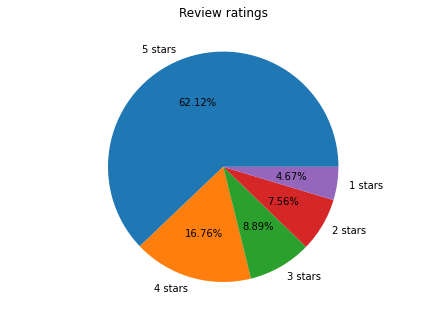

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['5 stars', '4 stars','3 stars','2 stars','1 stars',]
ax.pie(reviews_df['overall'].value_counts(), labels = label,autopct='%1.2f%%')
plt.title('Review ratings')
plt.show

We can see that the ratings are heavily in favor of 5 star ratings.

### Number of unique brands

In [8]:
brand_num = reviews_df['brand'].unique()
print(len(brand_num))

8025


## Irrelevant or inconsistent reviews
Some reviews may be irrelevant to the actual product or their content might not be consistant with the rating given.<br>
To help counteract this, most reviews have a system which allows other users to rate a review as helpful or not.<br>
In the amazon reviews, there exists such a system whereby each review shows the number of users that found a review helpful out of the number of users that read the review. 

In [9]:
reviews_df['helpful'].head(10)

0    [0, 0]
1    [0, 0]
2    [1, 1]
3    [0, 0]
4    [0, 0]
5    [0, 0]
6    [0, 0]
7    [0, 0]
8    [0, 0]
9    [0, 0]
Name: helpful, dtype: object

### Finding which reviews may be inconsistent/irrelevant

In [10]:
user_upvotes = []
total_users = []
for i in reviews_df['helpful']:
    user_upvotes.append(i[0])

for x in reviews_df['helpful']:
    total_users.append(x[1])

In [11]:
d = {"Upvotes": user_upvotes, "Total": total_users}
helpful_df = pd.DataFrame(d)

Reviews which have 0 upvotes out of any should be considered

In [12]:
not_helpful_df = helpful_df[(helpful_df['Upvotes'] == 0) & (helpful_df['Total'] > 1) ]
not_helpful_df

,Upvotes,Total
27,0,5
31,0,4
32,0,5
327,0,3
490,0,3
...,...,...
1373023,0,7
1373353,0,2
1373367,0,2
1373433,0,3


### Example of inconsistent/irrelevant review
The user rated the product 5 stars yet 0 out of 5 people found this review helpful. <br>
Upon reading the review it becomes clear as to why, the user did not even use the product.<br>
Other reviews may be relevant, but are inconsistent as the review does not reflect the rating given.

In [13]:
ex_df = reviews_df.loc[ 32 , : ]
print('Review: ', ex_df['reviewText'][0:])
print(ex_df[['overall', 'helpful']])

Review:  havent had the chance to use it yet hoping not to but in case i do i know i will be ready
overall         5
helpful    [0, 5]
Name: 32, dtype: object


### Reviews that may be inconsistent/irrelevant

In [14]:
rows = not_helpful_df.index
inconsistent_df = reviews_df.loc[rows, :]

In [15]:
drop = inconsistent_df[pd.isnull(inconsistent_df['brand'])].index
inconsistent_df.drop(drop , inplace=True)
inconsistent_df = inconsistent_df.reset_index(drop = True) 
inconsistent_df.head(10)

,asin,reviewText,overall,helpful,brand,title
0,5926025338,This was a great quality for the price. Haven...,4,"[0, 5]",Joe Rocket,Joe Rocket Mens RS-2 2 Piece Rain Suit Hi-Viz ...
1,5926025338,The item arrived earlier than expected and was...,5,"[0, 4]",Joe Rocket,Joe Rocket Mens RS-2 2 Piece Rain Suit Hi-Viz ...
2,5926025338,havent had the chance to use it yet hoping not...,5,"[0, 5]",Joe Rocket,Joe Rocket Mens RS-2 2 Piece Rain Suit Hi-Viz ...
3,B00002243X,This cable was of poor quality in both materia...,1,"[0, 3]",Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...
4,B00002243X,"It arrived quickly, looks sturdy and doesn't t...",4,"[0, 2]",Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...
5,B00002243X,The cable like strong enough and is what it's ...,3,"[0, 2]",Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...
6,B00002243Z,I've gone through over a dozen sets of cheap c...,5,"[0, 2]",Coleman Cable,Coleman Cable 08666 16-Feet Heavy-Duty Truck a...
7,B00002N6TS,"This product ""Liquid Wrench"" has failed me on ...",1,"[0, 5]",Radiator Specialty,Gunk Liquid Wrench 4 Oz
8,B00002N8JG,listing said made in USA but it is made in chi...,1,"[0, 2]",Gilmour,Gilmour Mid-Size Zinc Pistol Grip Nozzle 564
9,B00004RA7R,thought it was a nifty idea. no oil comes out ...,1,"[0, 2]",Oregon Cutting Systems,Oregon Cutting Systems #26365 Grease Gun


In [16]:
print(len(inconsistent_df['brand'].unique()))

1785


In [17]:
brands = inconsistent_df['brand'].unique()
num = []
for x in range(0,1785):
        num.append(0)

for i in range(0, len(inconsistent_df)):
    brand = inconsistent_df['brand'][i]
    for y in range(0,1785):
        if (brand == brands[y]):
            num[y] += 1

In [18]:
num_rev = {'brand': brands, 'inconsistent/irrelevant reviews': num}
num_rev_df = pd.DataFrame(num_rev)
num_rev_df 

,brand,inconsistent/irrelevant reviews
0,Joe Rocket,6
1,Coleman Cable,8
2,Radiator Specialty,1
3,Gilmour,1
4,Oregon Cutting Systems,1
...,...,...
1780,Eagle One,1
1781,Beckson,2
1782,Tech Tools,1
1783,Sticker Stand,1


### Remove inconsistent/irrelevant reviews
After finding out which reviews may be inconsistent/irrelevant, they are removed before sentiment analysis as to not skew the results of each brands trust.

In [19]:
drop = not_helpful_df.index
reviews_df.drop(drop , inplace=True)
reviews_df = reviews_df.reset_index(drop = True) 
reviews_df.head(5)

,asin,reviewText,overall,helpful,brand,title
0,0219400083,I loved the look and the great improvement at ...,4,"[0, 0]",Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,"Put these on my 2011 can am outlander 800xt, e...",5,"[0, 0]",Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,"Don't buy this item , its not a 4 window roll...",1,"[1, 1]",ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,"Nice. A decent model, and at a better price on...",4,"[0, 0]",Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,2409862403,I used this rating because I liked the key fob...,4,"[0, 0]",NaN,Car Remote Central Lock Kit Keyless Entry Syst...


### Comparison of consistent and inconsistent reviews by brand

In [20]:
num = []

for x in range(0,1785):
        num.append(0)
        
for i in range(0, len(inconsistent_df)):
    brand = reviews_df['brand'][i]
    for y in range(0,1785):
        if (brand == brands[y]):
            num[y] += 1

### Brands which have inconsistent/irrelevant reviews

In [21]:
num_rev2 = {'brand': brands, 'Consistent reviews': num}
num_rev_df2 = pd.DataFrame(num_rev2)
num_rev_df2 = pd.merge(num_rev_df2, num_rev_df, on=['brand'])
num_rev_df2

,brand,Consistent reviews,inconsistent/irrelevant reviews
0,Joe Rocket,17,6
1,Coleman Cable,323,8
2,Radiator Specialty,3,1
3,Gilmour,6,1
4,Oregon Cutting Systems,26,1
...,...,...,...
1780,Eagle One,0,1
1781,Beckson,0,2
1782,Tech Tools,0,1
1783,Sticker Stand,0,1


### Visualize difference

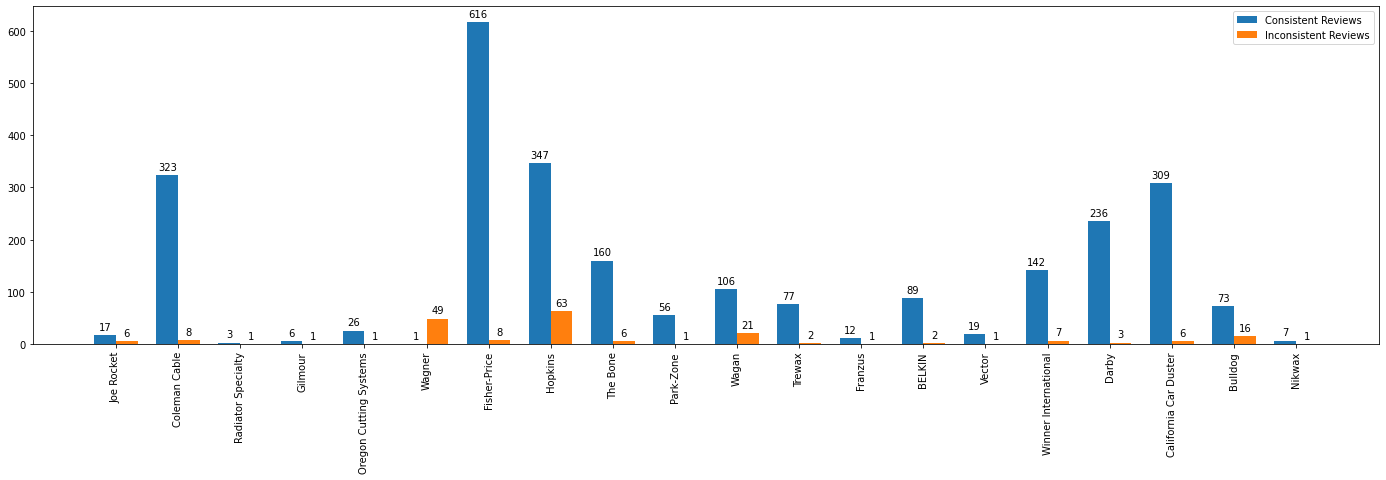

In [22]:
labels = brands[:20]

consistent = num_rev_df2['Consistent reviews'][:20]

inconsistent = num_rev_df2['inconsistent/irrelevant reviews'][:20]

    
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, consistent, width, label="Consistent Reviews")
rects2 = ax.bar(x + width/2, inconsistent, width, label="Inconsistent Reviews")


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
# plt.ylim(0, 6)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*3.5, box.height*2.5])
plt.show()

In [23]:
def plot_pie(brand, reviews, i):
    fig = plt.figure(i)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    label = ['Consistent', 'Inconsistent']
    ax.pie(reviews, labels = label,autopct='%1.2f%%')
    plt.title(brand)

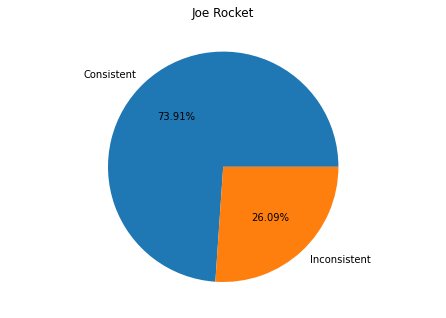

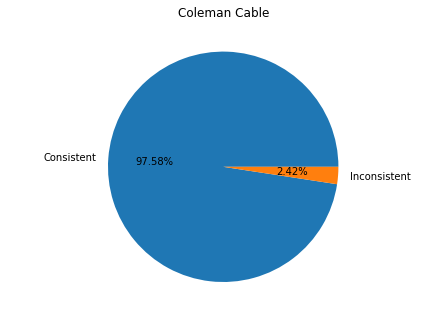

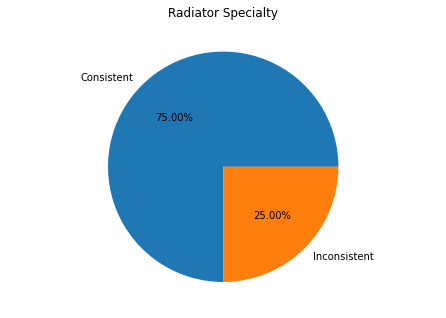

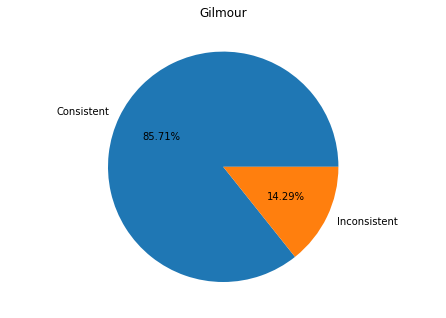

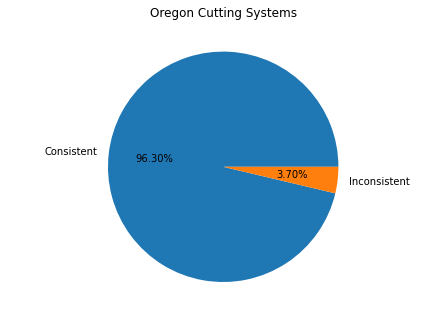

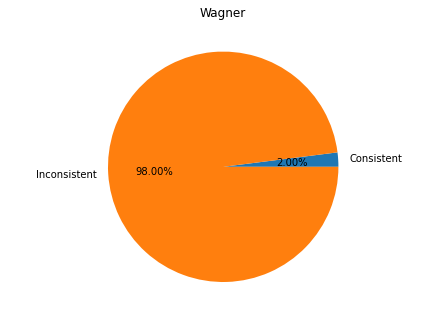

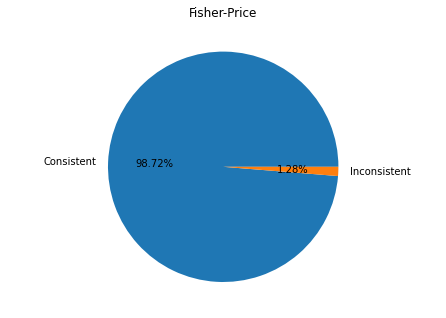

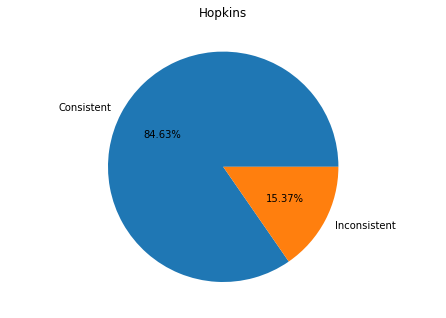

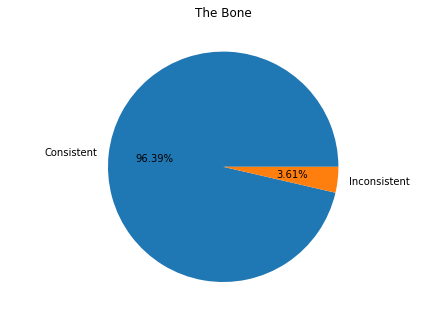

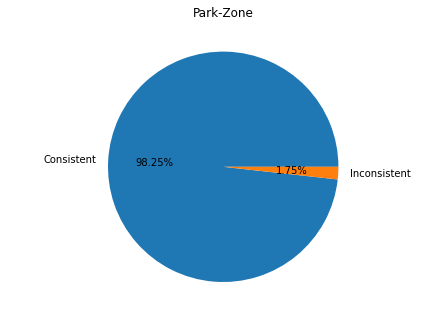

In [24]:
for i in range(0,10):
    plot_pie(brands[i], [num_rev_df2.loc[i, 'Consistent reviews'],num_rev_df2.loc[i, 'inconsistent/irrelevant reviews']], i)
plt.show()

## Pre-processing
### Set all text to lower case for easier processing

In [25]:
# del ex_df, helpful_df, inconsistent_df, num_rev_df2
reviews_df['reviewText'] = reviews_df['reviewText'].str.lower()
reviews_df.head(5)

,asin,reviewText,overall,helpful,brand,title
0,0219400083,i loved the look and the great improvement at ...,4,"[0, 0]",Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,"put these on my 2011 can am outlander 800xt, e...",5,"[0, 0]",Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,"don't buy this item , its not a 4 window roll...",1,"[1, 1]",ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,"nice. a decent model, and at a better price on...",4,"[0, 0]",Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,2409862403,i used this rating because i liked the key fob...,4,"[0, 0]",NaN,Car Remote Central Lock Kit Keyless Entry Syst...


### Remove symbols and punctuations
Using regex to remove all symbols and punctuations.

In [26]:
import re
reviews_df['reviewText'] = reviews_df['reviewText'].str.replace('[^\w\s]','')

In [27]:
reviews_df['reviewText'][2]

'dont buy this item   its not a 4 window roll up  its look nothing like the picture  they sent me some crap  and the seller is charging me 20  restocking fee plus i have to pay for shipping  i will never buy from them again  you have been warned '

### Drop reviews with no brand

In [28]:
drop = reviews_df[pd.isnull(reviews_df['brand'])].index
reviews_df.drop(drop , inplace=True)
reviews_df = reviews_df.reset_index(drop = True) 
reviews_df.head(7)

,asin,reviewText,overall,helpful,brand,title
0,0219400083,i loved the look and the great improvement at ...,4,"[0, 0]",Can-Am,Can-Am 219400083 HID Xenon Lighting System
1,0715000322,put these on my 2011 can am outlander 800xt ea...,5,"[0, 0]",Can-Am,Can-Am 715000322 ATV Heated Hand Grip Kit
2,0970408641,dont buy this item its not a 4 window roll u...,1,"[1, 1]",ScyTek Electronics,Scytek ACCWR-8 2 Windows Roll-up Module
3,1940825172,nice a decent model and at a better price on a...,4,"[0, 0]",Dust Tactics,Kampflaufer Iv-a - Jagdluther
4,4678615123,this product was bought with some reservation ...,5,"[0, 0]",Sem Products,SEM Paints (SEM15123) Color Coat - Santa Fe Ae...
5,4678615173,i build and restore jeeps and this product is ...,5,"[1, 1]",SEM,Sem Products 15173 Color Coat Camel Aero
6,4678615173,really really good product im restoring my 198...,5,"[0, 0]",SEM,Sem Products 15173 Color Coat Camel Aero


## Sentiment Analysis
### Using nltk to retrieve sentiment and sentiment score
NLTK comes equipped with it's own sentiment analyzer, the Sentiment Intensity Analyzer

In [29]:
all_reviews = reviews_df['reviewText']
all_sent_values = []
all_sentiments = []
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### NLTK Sentiment Intensity Analyzer
After importing, create a function to run the analyzer on text and return the score.

In [30]:
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

### Sample review

In [31]:
sample = reviews_df['reviewText'][1234]
print(sample)
print('Sentiment | Original ')
print(sentiment_value(sample),'/1    |', reviews_df['overall'][1510],'/5')


after learning of fisher price pricing to replace a nonproprietary common battery i began my research and found all their batteries can be replaced by commonly found batteries in any electrical supply store or online if thats easier  the cost i paid 1000 incl sh for the same 6volt 45ah battery fisher price wanted 3495 on sale plus shipping adapting them is easy cut the wire from the old battery so you can use the same plug the electrical store will have f type connectors which you will crimp on the ends of the plug wires you cut from the old battery place the black wire to ground and the white to  and plug in  you are good to go and never spend 4 x the price for a battery againif you have any questions send me a message and ill answer
Sentiment | Original 
0.4 /1    | 4 /5


## Run sentiment analysis

### Perform sentiment analysis on x rows.
Since there are over 1M reviews, take 30,000 for initial testing.

In [32]:
for i in reviews_df['reviewText'][0:30000]:
    all_sent_values.append(sentiment_value(i))

After running the sentiment analysis, append the sentiment, values and score accordingly. 

In [33]:
newRating = []
SENT_SCORE = []
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,30000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>0.5):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(sent)
        newRating.append(5)
        SENT_SCORE.append(1)
    elif (sent<=0.5 and sent > 0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(sent)
        newRating.append(4)
        SENT_SCORE.append(1)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(sent)
        newRating.append(3)
        SENT_SCORE.append(0)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(sent)
        newRating.append(2)
        SENT_SCORE.append(-1)
    else:
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(sent)
        newRating.append(1)
        SENT_SCORE.append(-1)

Place the obtained results into a temporary dataframe

In [34]:
temp = reviews_df[0:30000]
temp['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp['SENTIMENT'] = SENTIMENT
temp['SENT_SCORE'] = SENT_SCORE
temp['new Rating'] = newRating
temp[['reviewText', 'brand', 'overall', 'new Rating', 'SENTIMENT_VALUE', 'SENTIMENT', 'SENT_SCORE']].head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,reviewText,brand,overall,new Rating,SENTIMENT_VALUE,SENTIMENT,SENT_SCORE
0,i loved the look and the great improvement at ...,Can-Am,4,5,0.7,Positive,1
1,put these on my 2011 can am outlander 800xt ea...,Can-Am,5,5,0.7,Positive,1
2,dont buy this item its not a 4 window roll u...,ScyTek Electronics,1,1,-0.7,Negative,-1
3,nice a decent model and at a better price on a...,Dust Tactics,4,4,0.2,Positive,1
4,this product was bought with some reservation ...,Sem Products,5,4,0.5,Positive,1


### Bar chat to illustrate the difference in sentiment scores

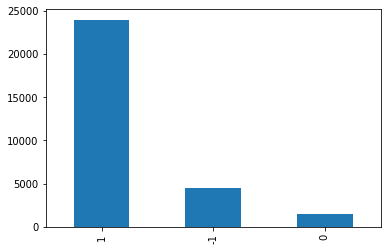

In [35]:
temp['SENT_SCORE'].value_counts().plot(kind='bar')

### Check for accuracy

In [36]:
counter = 0
for i in range(0,30000):
    if (abs(temp['overall'][i]-temp['new Rating'][i])>1):
        counter += 1

accuracy = (temp.shape[0]-counter)/temp.shape[0]
percent_accuracy = accuracy*100
print('%', percent_accuracy)

% 80.60000000000001


### Select brands to calculate trust

In [37]:
print(len(temp['brand'].unique()))

467


There are 471 brands in this subset of data, but only a few will be used to test.

### Top brands
Finding which are the top brands based on total ratings and sentiment value.

In [38]:
brand_df = pd.pivot_table(temp,index=['brand'],values=['overall','new Rating','SENTIMENT_VALUE','SENT_SCORE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
brand_df = brand_df.sort_values(by=('sum', 'overall'), ascending = False)
n_brands = brand_df.head(5).index
brand_df.head(10)

sum                                \
                    SENTIMENT_VALUE SENT_SCORE new Rating overall   
brand                                                               
Auto Ventshade                942.1       1194       7042    6936   
Plasticolor                   985.1       1222       6962    6777   
CIPA                          609.7        818       5748    5546   
Bon-Aire                      461.6        595       3726    3734   
Hopkins                       358.0        511       3289    3502   
HELLA                         426.0        552       3271    3221   
K&amp;N ENGINEERING           362.2        499       2807    2957   
K&amp;N                       360.2        490       2712    2900   
Lexol                         357.8        461       2795    2809   
Superior                      331.3        429       3102    2807   

                               mean                                  
                    SENTIMENT_VALUE SENT_SCORE new Rating   overall  
brand                                                                
Auto Ventshade             0.590658   0.748589   4.415047  4.348589  
Plasticolor                0.640091   0.794022   4.523717  4.403509  
CIPA                       0.430275   0.577276   4.056457  3.913903  
Bon-Aire                   0.531185   0.684695   4.287687  4.296893  
Hopkins                    0.448622   0.640351   4.121554  4.388471  
HELLA                      0.570281   0.738956   4.378849  4.311914  
K&amp;N ENGINEERING        0.573101   0.789557   4.441456  4.678797  
K&amp;N                    0.593410   0.807249   4.467875  4.777595  
Lexol                      0.559062   0.720313   4.367188  4.389062  
Superior                   0.432507   0.560052   4.049608  3.664491

### Sentiment values for each brand
Take the top 5 brands and then append all the sentiment scores for their products.

In [39]:
Plasticolor = []
AutoVentshade = []
Hopkins = []
CIPA = []
BonAire = []

Plasticolor_value = []
AutoVentshade_value = []
Hopkins_value = []
CIPA_value = []
BonAire_value = []


for i in range(0,30000):
    score = SENT_SCORE[i]
    value = all_sent_values[i]
    brand = temp['brand'][i]
    if (brand == 'Plasticolor'):
        Plasticolor.append(score)
        Plasticolor_value.append(value)
    elif (brand == 'Auto Ventshade'):
        AutoVentshade.append(score)
        AutoVentshade_value.append(value)
    elif (brand == 'Hopkins'):
        Hopkins.append(score)
        Hopkins_value.append(value)
    elif (brand == 'CIPA'):
        CIPA.append(score)
        CIPA_value.append(value)
    elif (brand == 'Bon-Aire'):
        BonAire.append(score)
        BonAire_value.append(value)
   

    else:
        continue

In [40]:
brand_scores = [Plasticolor, AutoVentshade, Hopkins, CIPA, BonAire]
brand_values = [Plasticolor_value, AutoVentshade_value, Hopkins_value, CIPA_value, BonAire_value]

### Number of reviews per brand

In [41]:
for l in brand_scores:
    print(len(l))

1539
1595
798
1417
869


### Plot the distribution of sentiment values across different brands
Visualize how each brand stacks up to one another in terms of sentiments

In [42]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,798)
    
    pylab.ylabel('Sentiment')
    pylab.title(name)
    pylab.plot(x, brand[:798], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

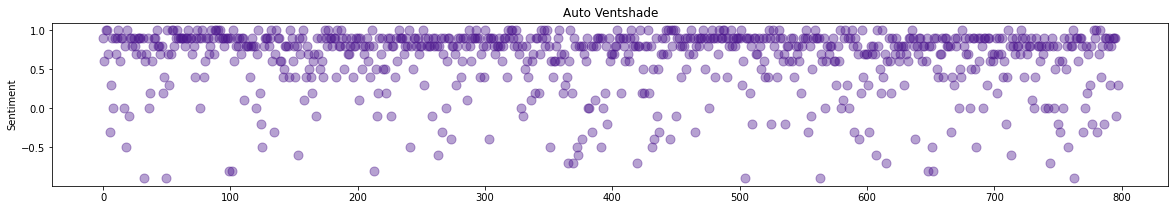

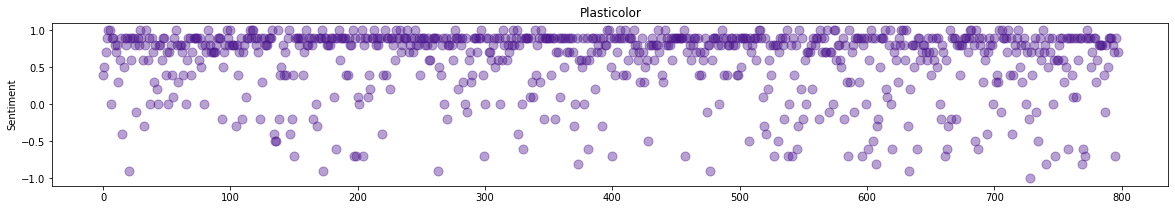

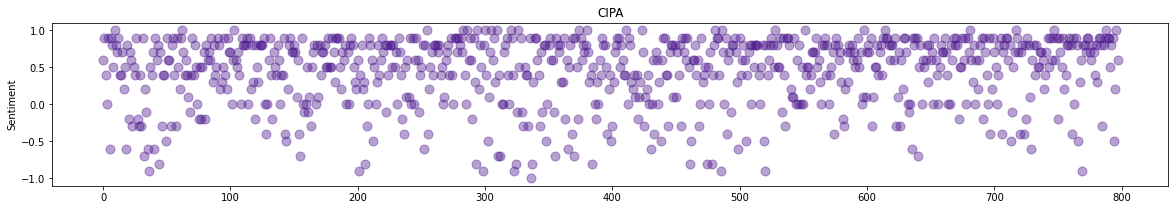

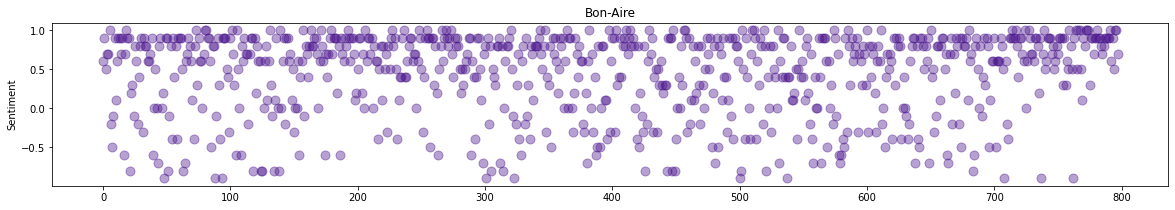

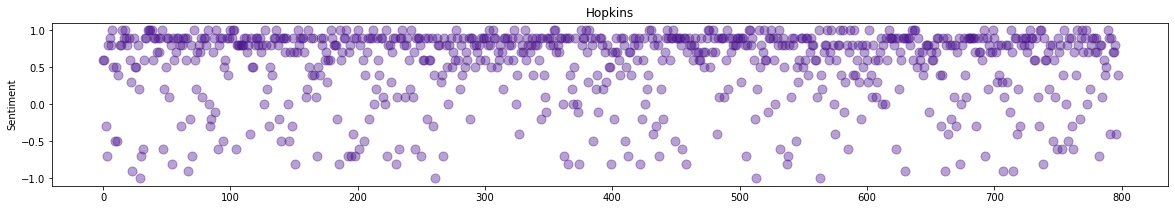

In [43]:
for i in range(0,len(brand_values)):
    plot_brand(brand_values[i],n_brands[i])

### Sum and Mean Plots of Rating with Sentiments
Visualize how each brand's sum ratings relate to their mean ratings

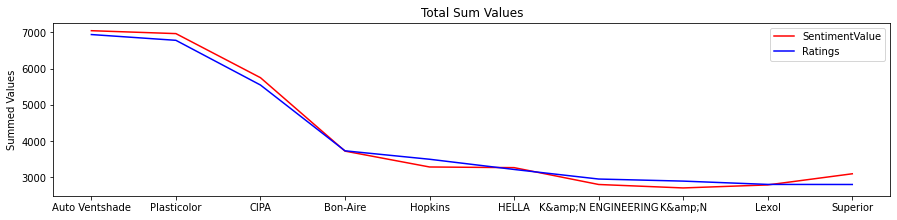

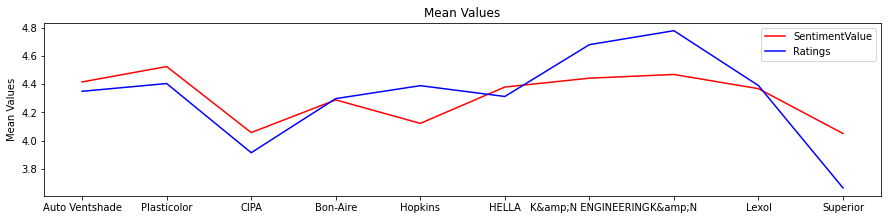

In [44]:
names = brand_df.index[:10]
y = brand_df['sum', 'new Rating'][:10]
y2 = brand_df['sum', 'overall'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Ratings'])

y_new = brand_df['mean', 'new Rating'][:10]
y2_new = brand_df['mean', 'overall'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Ratings'])


pylab.show()

### Calculate Trust
The formulas to calculate trust score: <br>
$t_d = \frac{SP_d}{SP_d+SN_d}RS$ <br>
<br>
trust weight:<br>
$w_d = \frac{SP_d+SN_d}{\sum_{d=1}^mSPd + SNd}$<br>
<br>
and overall trust score: <br>$T_s = \sum_{d=1}^m t_d w_d$

### Retrieve positive and negative trust from each review.
Every sentiment value above 0 becomes 1 while every value below 0 becomes -1

In [45]:
def positive(brands, num):
    pos = 0
    for i in range(0,len(brands[num])):
        if (abs(brands[num][i])==1):
            pos += 1
    return pos

In [46]:
def negative(brands, num):
    neg = 0
    for i in range(0,len(brands[num])):
        if (brands[num][i])==-1:
             neg += 1
    return neg

In this case, $t_d = \frac{SP_d}{SP_d+SN_d}RS$ <br>
$d = 1, RS = 5 $ <br>
Which becomes:

In [47]:
def get_trust(l_brands, n_brands):
    trust = []
    for i in range(len(n_brands)):
        trust.append((positive(l_brands, i)/(positive(l_brands, i)+negative(l_brands, i)))*5)
    return trust
trust_1 = get_trust(brand_scores, n_brands)
print(trust_1)

[4.58743842364532, 4.49503794512551, 4.324796274738068, 4.175416924027177, 4.349385245901639]


### Trust weight
In this case, $w_d = \frac{SP_d+SN_d}{\sum_{d=1}^mSPd + SNd}$ <br>
$d = 1, m = 1$ <br>
Which becomes:

In [48]:
def get_weight(l_brands, n_brands):
    weight = []
    for i in range(len(n_brands)):
        weight.append((positive(l_brands, i)+negative(l_brands, i))/(positive(l_brands, i)+negative(l_brands, i)))
    return weight
weight_1 = get_weight(brand_scores, n_brands)
print(weight_1)

[1.0, 1.0, 1.0, 1.0, 1.0]


### Overall trust score
In this case, $T_s = \sum_{d=1}^m t_d w_d$ <br>
$d = 1, m = 1$ <br>
Which becomes:

In [49]:
def get_overall_trust(trust, weight, n_brands):
    t_brands = []
    for i in range(len(n_brands)):
        t_brands.append(trust[i]*weight[i])
    return t_brands
tbrands = get_overall_trust(trust_1, weight_1, n_brands)
print(tbrands)

[4.58743842364532, 4.49503794512551, 4.324796274738068, 4.175416924027177, 4.349385245901639]


### Average Ratings
Average ratings for each of the selected brands

In [50]:
total_ratings = [0,0,0,0,0]
review_count = [0,0,0,0,0]
for i in range(0,30000):
    brand = temp['brand'][i]
    for y in range(0,5):
        if (brand == n_brands[y]):
            total_ratings[y] += temp['overall'][i]
            review_count[y] += 1
        else:
            continue

In [51]:
ratings = []
for i in range(len(total_ratings)):
    ratings.append(total_ratings[i]/review_count[i])
print(ratings)

[4.34858934169279, 4.4035087719298245, 3.9139026111503177, 4.296892980437284, 4.388471177944862]


## Results

In [52]:
output = (n_brands, tbrands, ratings)
print(output)

(Index(['Auto Ventshade', 'Plasticolor', 'CIPA', 'Bon-Aire', 'Hopkins'], dtype='object', name='brand'), [4.58743842364532, 4.49503794512551, 4.324796274738068, 4.175416924027177, 4.349385245901639], [4.34858934169279, 4.4035087719298245, 3.9139026111503177, 4.296892980437284, 4.388471177944862])


In [53]:
print("Output: (brand, trust, ratings)")
for i in range(len(n_brands)):
    print(output[0][i],',', output[1][i],',', output[2][i])

Output: (brand, trust, ratings)
Auto Ventshade , 4.58743842364532 , 4.34858934169279
Plasticolor , 4.49503794512551 , 4.4035087719298245
CIPA , 4.324796274738068 , 3.9139026111503177
Bon-Aire , 4.175416924027177 , 4.296892980437284
Hopkins , 4.349385245901639 , 4.388471177944862


### Visualize comparison of brands overall trust and average ratings 

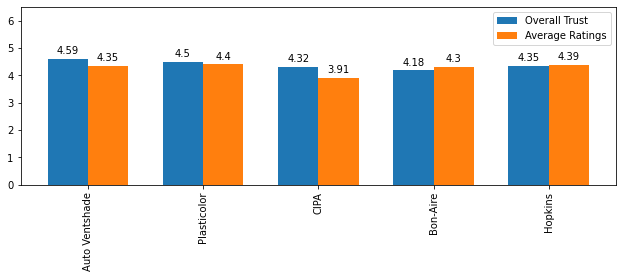

In [54]:
labels = output[0][0:5]
                   
trust = []
for i in output[1][0:5]:
    trust.append(float("{:.2f}".format(i)))

avgRating = []
for y in output[2][0:5]:
    avgRating.append(float("{:.2f}".format(y)))

    
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trust, width, label="Overall Trust")
rects2 = ax.bar(x + width/2, avgRating, width, label="Average Ratings")


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0, 6.5)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height])
plt.show()

The output shows the relation between a brand’s trust and its average ratings and compared to other brands.

### Perform sentiment analysis on more data rows.
Repeat the process of sentiment analysis on 100k reviews.

In [55]:
for i in all_reviews[:100000]:
    all_sentiments.append(sentiment_value(i))

In [56]:
newRating2 = []
SENT_SCORE2 = []
SENTIMENT_VALUE2 = []
SENTIMENT2 = []
for i in range(0,100000):
    sent = all_sentiments[i]
    if (sent<=1 and sent>0.5):
        SENTIMENT2.append('Positive')
        SENTIMENT_VALUE2.append(sent)
        newRating2.append(5)
        SENT_SCORE2.append(1)
    elif (sent<=0.5 and sent > 0):
        SENTIMENT2.append('Positive')
        SENTIMENT_VALUE2.append(sent)
        newRating2.append(4)
        SENT_SCORE2.append(1)
    elif (sent==0):
        SENTIMENT2.append('Neutral')
        SENTIMENT_VALUE2.append(sent)
        newRating2.append(3)
        SENT_SCORE2.append(0)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT2.append('Negative')
        SENTIMENT_VALUE2.append(sent)
        newRating2.append(2)
        SENT_SCORE2.append(-1)
    else:
        SENTIMENT2.append('Negative')
        SENTIMENT_VALUE2.append(sent)
        newRating2.append(1)
        SENT_SCORE2.append(-1)

Place the obtained results into a temporary dataframe

In [57]:
temp_data = reviews_df[:100000]
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE2
temp_data['SENTIMENT'] = SENTIMENT2
temp_data['SENT_SCORE'] = SENT_SCORE2
temp_data['new Rating'] = newRating2
temp_data[['reviewText', 'brand', 'overall', 'new Rating', 'SENTIMENT_VALUE', 'SENTIMENT', 'SENT_SCORE']].head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,reviewText,brand,overall,new Rating,SENTIMENT_VALUE,SENTIMENT,SENT_SCORE
0,i loved the look and the great improvement at ...,Can-Am,4,5,0.7,Positive,1
1,put these on my 2011 can am outlander 800xt ea...,Can-Am,5,5,0.7,Positive,1
2,dont buy this item its not a 4 window roll u...,ScyTek Electronics,1,1,-0.7,Negative,-1
3,nice a decent model and at a better price on a...,Dust Tactics,4,4,0.2,Positive,1
4,this product was bought with some reservation ...,Sem Products,5,4,0.5,Positive,1


### Bar chat to illustrate the difference in sentiment scores

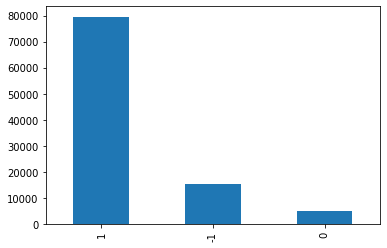

In [58]:
temp_data['SENT_SCORE'].value_counts().plot(kind='bar')

### Check for Accuracy

In [59]:
counter = 0
for i in range(0,100000):
    if (abs(temp_data['overall'][i]-temp_data['new Rating'][i])>1):
        counter += 1

accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]
percent_accuracy = accuracy*100
print('%', percent_accuracy)

% 80.281


### Select top 10 brands
Finding which are the top brands based on total ratings and sentiment value.

In [60]:
brand_df2 = pd.pivot_table(temp,index=['brand'],values=['overall', 'new Rating','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
brand_df2 = brand_df.sort_values(by=('sum', 'overall'), ascending = False)
n_brands2 = brand_df.head(10).index
brand_df2.head(10)

sum                                \
                    SENTIMENT_VALUE SENT_SCORE new Rating overall   
brand                                                               
Auto Ventshade                942.1       1194       7042    6936   
Plasticolor                   985.1       1222       6962    6777   
CIPA                          609.7        818       5748    5546   
Bon-Aire                      461.6        595       3726    3734   
Hopkins                       358.0        511       3289    3502   
HELLA                         426.0        552       3271    3221   
K&amp;N ENGINEERING           362.2        499       2807    2957   
K&amp;N                       360.2        490       2712    2900   
Lexol                         357.8        461       2795    2809   
Superior                      331.3        429       3102    2807   

                               mean                                  
                    SENTIMENT_VALUE SENT_SCORE new Rating   overall  
brand                                                                
Auto Ventshade             0.590658   0.748589   4.415047  4.348589  
Plasticolor                0.640091   0.794022   4.523717  4.403509  
CIPA                       0.430275   0.577276   4.056457  3.913903  
Bon-Aire                   0.531185   0.684695   4.287687  4.296893  
Hopkins                    0.448622   0.640351   4.121554  4.388471  
HELLA                      0.570281   0.738956   4.378849  4.311914  
K&amp;N ENGINEERING        0.573101   0.789557   4.441456  4.678797  
K&amp;N                    0.593410   0.807249   4.467875  4.777595  
Lexol                      0.559062   0.720313   4.367188  4.389062  
Superior                   0.432507   0.560052   4.049608  3.664491

### Sentiment values for each brand
Take the top 10 brands and then append all the sentiment scores for their products.

In [61]:
Plasticolor = []
AutoVentshade = []
Hopkins = []
CIPA = []
BonAire = []
HELLA = []
KampN_Eng = []
KampN = []
Superior = []
Lexol = []

Plasticolor_value = []
AutoVentshade_value = []
Hopkins_value = []
CIPA_value = []
BonAire_value = []
HELLA_value = []
KampN_Eng_value = []
KampN_value = []
Superior_value = []
Lexol_value = []

for i in range(0,100000):
    score = SENT_SCORE2[i]
    brand = temp_data['brand'][i]
    value = all_sentiments[i]
    if (brand == 'Plasticolor'):
        Plasticolor.append(score)
        Plasticolor_value.append(value)
    elif (brand == 'Auto Ventshade'):
        AutoVentshade.append(score)
        AutoVentshade_value.append(value)
    elif (brand == 'Hopkins'):
        Hopkins.append(score)
        Hopkins_value.append(value)
    elif (brand == 'CIPA'):
        CIPA.append(score)
        CIPA_value.append(value)
    elif (brand == 'Bon-Aire'):
        BonAire.append(score)
        BonAire_value.append(value)
    elif (brand == 'HELLA'):
        HELLA.append(score)
        HELLA_value.append(value)
    elif (brand == 'K&amp;N ENGINEERING'):
        KampN_Eng.append(score)
        KampN_Eng_value.append(value)
    elif (brand == 'K&amp;N'):
        KampN.append(score)
        KampN_value.append(value)
    elif (brand == 'Superior'):
        Superior.append(score)
        Superior_value.append(value)
    elif (brand == 'Lexol'):
        Lexol.append(score)
        Lexol_value.append(value)
    else:
        continue

In [62]:
brand_scores2 = [Plasticolor, AutoVentshade, Hopkins, CIPA, BonAire, HELLA, KampN_Eng, KampN, Superior, Lexol ]
brand_values2 = [Plasticolor_value, AutoVentshade_value, Hopkins_value, CIPA_value, BonAire_value, \
                 HELLA_value, KampN_Eng_value, KampN_value, Superior_value, Lexol_value ]

### Number of reviews per brand

In [63]:
for l in brand_scores2:
    print(len(l))

1867
1853
1919
2215
869
766
696
3751
777
761


### Plot the distribution of sentiment values across different brands
Visualize how each brand stacks up to one another in terms of sentiments

In [64]:
def plot_brand2(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,670)
    
    pylab.ylabel('Sentiment')
    pylab.title(name)
    pylab.plot(x, brand[:670], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

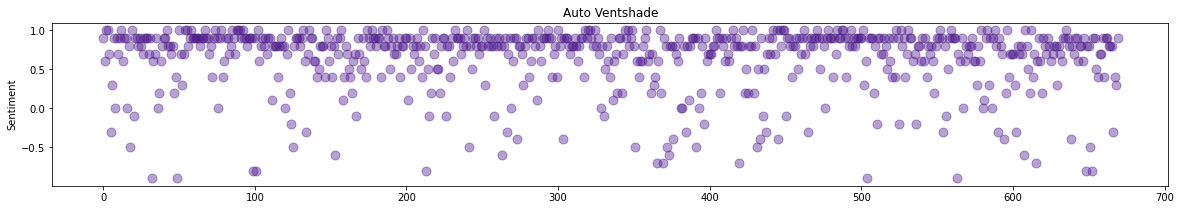

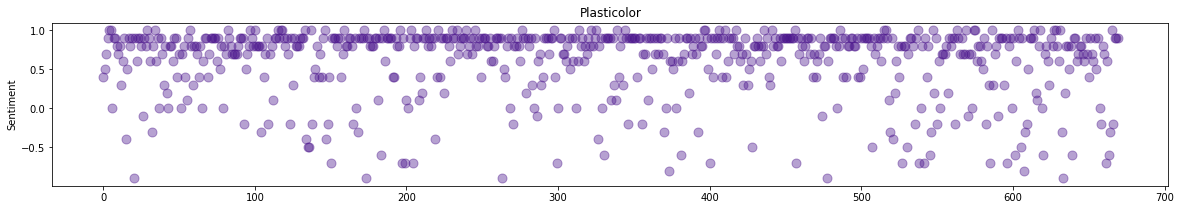

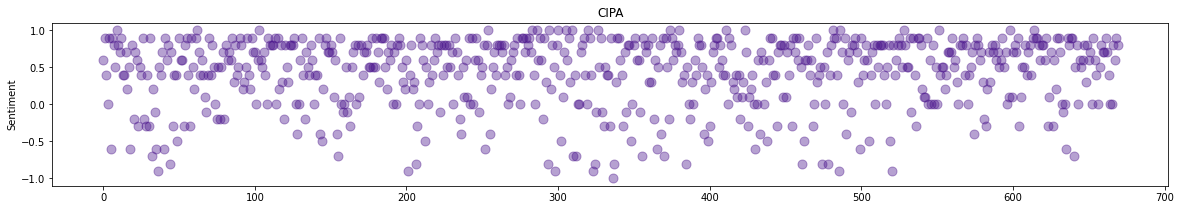

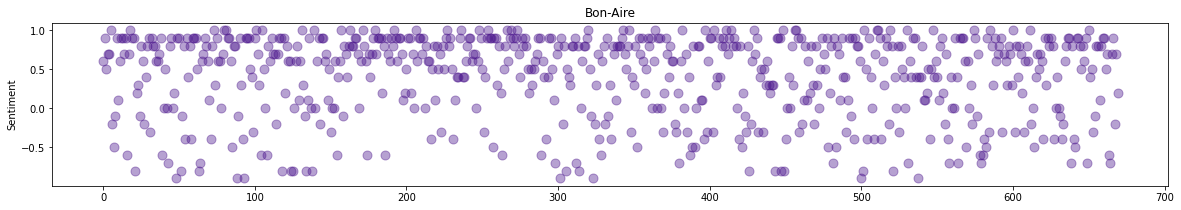

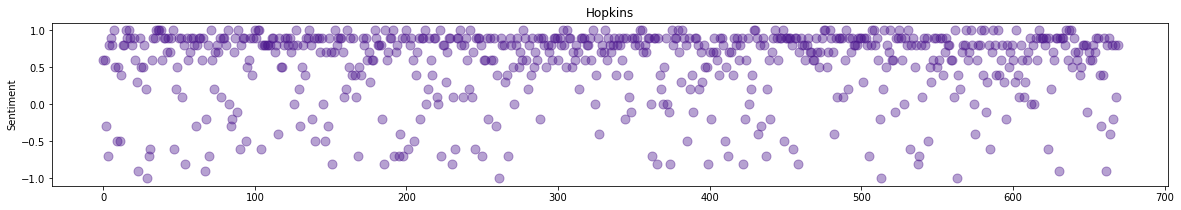

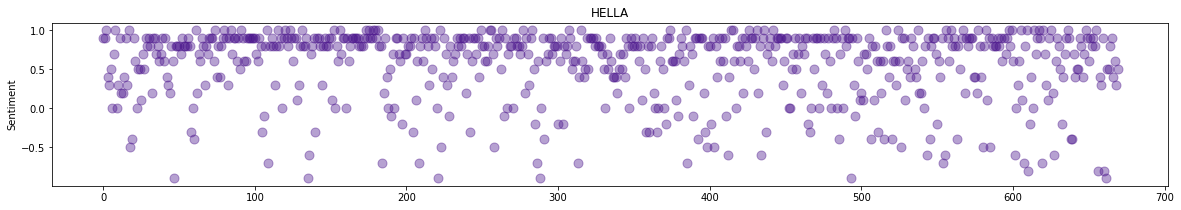

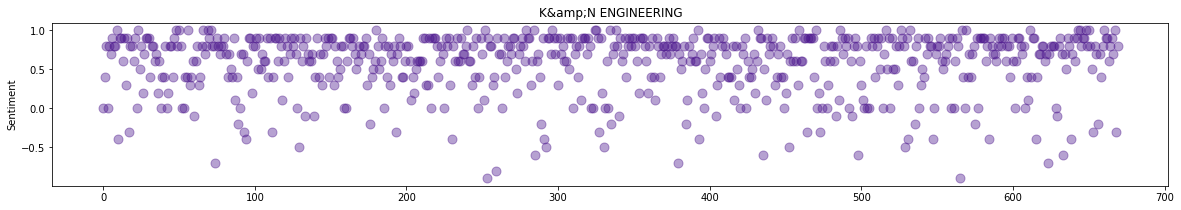

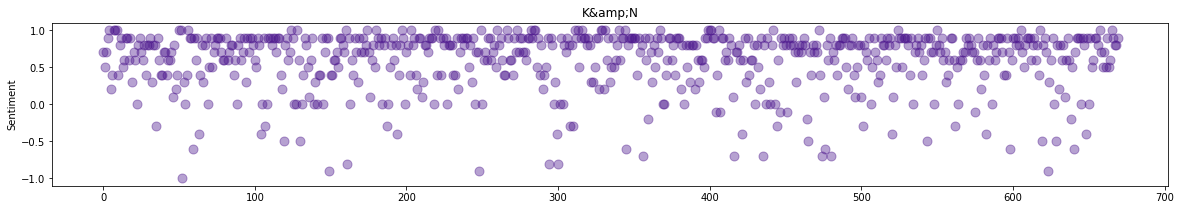

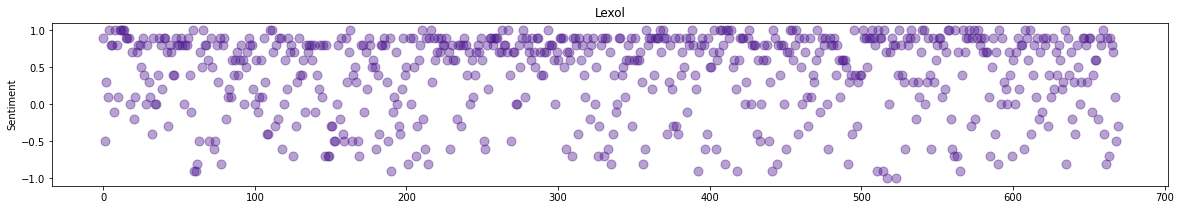

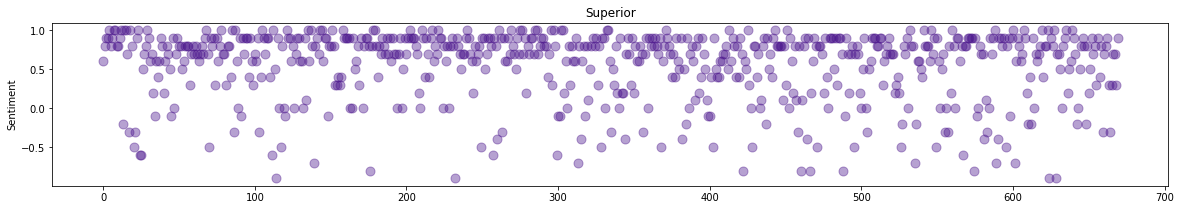

In [65]:
for i in range(0,len(n_brands2)):
    plot_brand2(brand_values2[i],n_brands2[i])

### Sum and Mean Plots of Rating with Sentiments
Visualize how each brand's sum ratings relate to their mean ratings

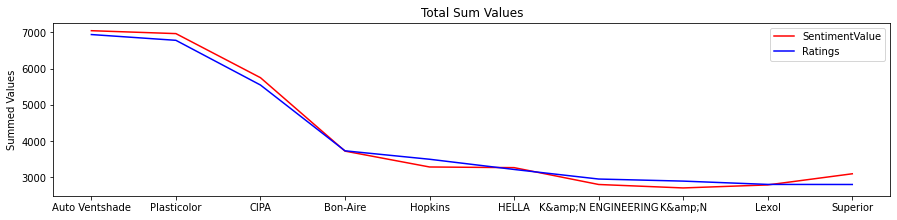

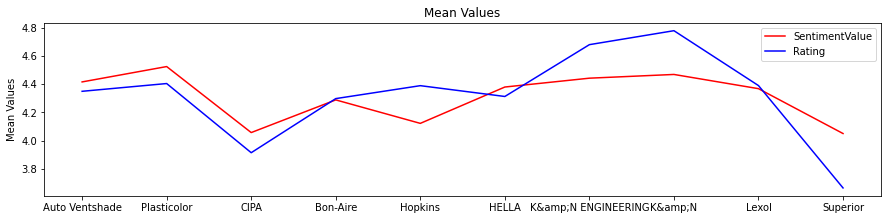

In [66]:
names2 = brand_df2.index[:10]
yy = brand_df2['sum', 'new Rating'][:10]
yy2 = brand_df2['sum', 'overall'][:10]

pylab.figure(figsize=(15,7))
xx = range(10)
pylab.subplot(2,1,1)
pylab.xticks(xx, names2)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(xx,yy,"r-",xx,yy2,'b-')
pylab.legend(['SentimentValue', 'Ratings'])

y_new2 = brand_df2['mean', 'new Rating'][:10]
y2_new2 = brand_df2['mean', 'overall'][:10]

pylab.figure(figsize=(15,7))

pylab.subplot(2,1,2)
pylab.xticks(xx, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(xx,y_new2,"r-",xx,y2_new2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

pylab.show()

### Calculate trust, weights, and overall trust.
Using the functions created prior

In [67]:
print("Trust: ")
trust_2 = get_trust(brand_scores2, n_brands2)
print(trust_2)
print("Weights: ")
weight_2 = get_weight(brand_scores2, n_brands2)
print(weight_2)
print("Overall Trust: ")
t_brands2 = get_overall_trust(trust_2, weight_2, n_brands2)
print(t_brands2)

Trust: 
[4.5696202531645564, 4.480942828485456, 4.335119337554798, 4.281968535699879, 4.349385245901639, 4.470158343483557, 4.637784090909091, 4.611352595244183, 4.133109619686801, 4.461633663366337]
Weights: 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Overall Trust: 
[4.5696202531645564, 4.480942828485456, 4.335119337554798, 4.281968535699879, 4.349385245901639, 4.470158343483557, 4.637784090909091, 4.611352595244183, 4.133109619686801, 4.461633663366337]


### Average ratings
Average ratings for each brand

In [68]:
total_ratings2 = [0,0,0,0,0,0,0,0,0,0]
review_count2 = [0,0,0,0,0,0,0,0,0,0]
for i in range (0, 100000):
    brand = temp_data['brand'][i]
    for y in range(0,10):
        if (brand == n_brands2[y]):
            total_ratings2[y] += temp_data['overall'][i]
            review_count2[y] += 1
        else:
            continue

In [69]:
ratings2 = []
for i in range(len(total_ratings2)):
    ratings2.append(total_ratings2[i]/review_count2[i])
print(ratings2)

[4.317323259579061, 4.389394750937333, 4.0121896162528214, 4.296892980437284, 4.389786347055758, 4.304177545691906, 4.691091954022989, 4.686483604372167, 4.336399474375821, 3.658944658944659]


## Results

In [70]:
output2 = (n_brands2, t_brands2, ratings2)
print(output2)

(Index(['Auto Ventshade', 'Plasticolor', 'CIPA', 'Bon-Aire', 'Hopkins', 'HELLA',
       'K&amp;N ENGINEERING', 'K&amp;N', 'Lexol', 'Superior'],
      dtype='object', name='brand'), [4.5696202531645564, 4.480942828485456, 4.335119337554798, 4.281968535699879, 4.349385245901639, 4.470158343483557, 4.637784090909091, 4.611352595244183, 4.133109619686801, 4.461633663366337], [4.317323259579061, 4.389394750937333, 4.0121896162528214, 4.296892980437284, 4.389786347055758, 4.304177545691906, 4.691091954022989, 4.686483604372167, 4.336399474375821, 3.658944658944659])


In [71]:
print("Output: (brand, trust, ratings)")
for i in range(len(n_brands2)):
    print(output2[0][i],',', output2[1][i],',', output2[2][i])

Output: (brand, trust, ratings)
Auto Ventshade , 4.5696202531645564 , 4.317323259579061
Plasticolor , 4.480942828485456 , 4.389394750937333
CIPA , 4.335119337554798 , 4.0121896162528214
Bon-Aire , 4.281968535699879 , 4.296892980437284
Hopkins , 4.349385245901639 , 4.389786347055758
HELLA , 4.470158343483557 , 4.304177545691906
K&amp;N ENGINEERING , 4.637784090909091 , 4.691091954022989
K&amp;N , 4.611352595244183 , 4.686483604372167
Lexol , 4.133109619686801 , 4.336399474375821
Superior , 4.461633663366337 , 3.658944658944659


### Visualize comparison between brands trust and average ratings

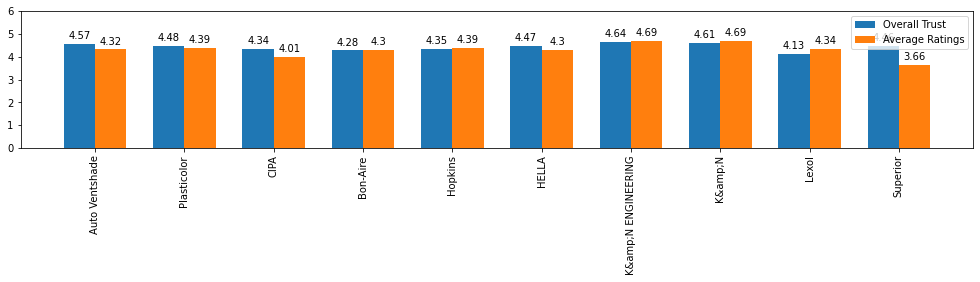

In [72]:
labels = output2[0][0:]
                   
trust = []
for i in output2[1][0:]:
    trust.append(float("{:.2f}".format(i)))

avgRating = []
for y in output2[2][0:]:
    avgRating.append(float("{:.2f}".format(y)))

    
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trust, width, label="Overall Trust")
rects2 = ax.bar(x + width/2, avgRating, width, label="Average Ratings")


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim(0, 6)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2.4, box.height])
plt.show()

The output shows the relation between a brand’s trust and its average ratings and compared to other brands. Typically the higher the average rating then the higher the brand’s trust will be. 
Another interesting fact is that as you traverse the lower brands, the sentiment concentration goes from mostly positive to more spread amongst neutral and negative.